In [1]:
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

import random
import itertools

from datetime import datetime, timedelta

import string

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm_notebook

In [2]:
# create variables to be used later
letters = [x for x in string.ascii_uppercase]
destinations = [''.join(x) for x in list(itertools.combinations(letters[8:13], 3))]
departments = ['Department-' + x for x in letters[:6]]
sectors = ['Sector-' + x for x in letters[:5]]

print(destinations)
print(departments)
print(sectors)

['IJK', 'IJL', 'IJM', 'IKL', 'IKM', 'ILM', 'JKL', 'JKM', 'JLM', 'KLM']
['Department-A', 'Department-B', 'Department-C', 'Department-D', 'Department-E', 'Department-F']
['Sector-A', 'Sector-B', 'Sector-C', 'Sector-D', 'Sector-E']


## Generate random data

In this section random data is generated.

In [3]:
def random_date(start, end):
  try:
    return start + timedelta(days=random.randint(0, int((end - start).days)))
  except RuntimeError:
    print('Could not generate random date')
    raise

In [4]:
def generate_reports(nrows, start, end):
  try:
    data = []
    for i in tqdm_notebook(range(nrows)):
      report = i + 1
      date = random_date(start, end)
      month = date.month
      score = int(random.uniform(month, month+1)*10)
      information = random.choice(destinations) + ' - ' + \
                    ''.join(random.sample(letters, 5))
      department = random.choice(departments)
      sector = random.choice(sectors)
      data.append((report, date, information, department, sector, score))
    return data
  except ValueError:
    print('Could not generate random data!')
    return None

In [5]:
def generate_trips(nrows, start, end):
  try:
    data = []
    for i in tqdm_notebook(range(nrows)):
      date = random_date(start, end)
      # date_str = date.strftime("%Y-%m-%d")
      year = date.year
      month = date.month
      trip = int(year * random.uniform(month, month+1))
      destination = random.choice(destinations)
      data.append((date, destination, trip))
    return data
  except ValueError:
    print('Could not generate random data!')
    return None  

In [6]:
# generate a random report table
start_date = datetime(2017, 1, 1).date()
end_date = datetime(2017, 12, 30).date()
nrows = 100000
cols = ['Report','Date', 'Information', 'Department', 'Sector', 'Score']
data = generate_reports(nrows, start_date, end_date)
df_reports = pd.DataFrame(columns=cols, data=data)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [7]:
# generate a random trip table
start_date = datetime(2016, 1, 1).date()
end_date = datetime(2017, 12, 30).date()
nrows = 300000
cols = ['Date', 'Destination', 'Trip']
data = generate_trips(200, start_date, end_date)
df_trips = pd.DataFrame(columns=cols, data=data)

  0%|          | 0/200 [00:00<?, ?it/s]

## Analysis with Pandas

In this section analysis is done by using Pandas.

In [8]:
df_reports['Date'] = pd.to_datetime(df_reports['Date'])
df_reports['Destination'] = df_reports['Information'].str.split('-').str[0].str.strip()
df_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report       100000 non-null  int64         
 1   Date         100000 non-null  datetime64[ns]
 2   Information  100000 non-null  object        
 3   Department   100000 non-null  object        
 4   Sector       100000 non-null  object        
 5   Score        100000 non-null  int64         
 6   Destination  100000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 5.3+ MB


In [9]:
df_trips['Date'] = pd.to_datetime(df_trips['Date'])
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         200 non-null    datetime64[ns]
 1   Destination  200 non-null    object        
 2   Trip         200 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.8+ KB


In [10]:
# join tables on date and destination cols
df = pd.merge(df_reports, df_trips, on = ['Date', 'Destination'], how = 'left')
df[~df['Trip'].isna()]

,Report,Date,Information,Department,Sector,Score,Destination,Trip
21,22,2017-06-30,IJL - WSZJG,Department-D,Sector-D,62,IJL,13474.0
31,32,2017-07-01,IKL - GDIZN,Department-E,Sector-A,71,IKL,14655.0
52,53,2017-11-03,IJK - HDTRK,Department-B,Sector-D,115,IJK,23740.0
111,112,2017-03-22,IKL - JNOQT,Department-B,Sector-B,36,IKL,7155.0
150,151,2017-12-30,IKM - NIBYG,Department-B,Sector-A,126,IKM,25412.0
...,...,...,...,...,...,...,...,...
99916,99917,2017-05-15,JKM - CPGHS,Department-E,Sector-B,55,JKM,11487.0
99933,99934,2017-09-30,JLM - NHVDK,Department-F,Sector-B,92,JLM,18296.0
99949,99950,2017-09-30,JLM - SVFUR,Department-F,Sector-D,94,JLM,18296.0
99959,99960,2017-11-03,IJK - OBFMT,Department-F,Sector-C,119,IJK,23740.0


In [11]:
# drop nan values from table
df.dropna(inplace=True)

In [12]:
def plot_1d_histo(df, col):
  try:
    plt.figure(figsize=(14, 11))
    for i, c in enumerate(sorted(df[col].unique())):
      plt.subplot(3,2,i+1)
      df[df[col]==c]['Trip'].plot.hist(alpha=0.7, fc='g', ec='g')
      plt.title(c)
    return None
  except RuntimeError:
    print('Could not plotted histogram!') 

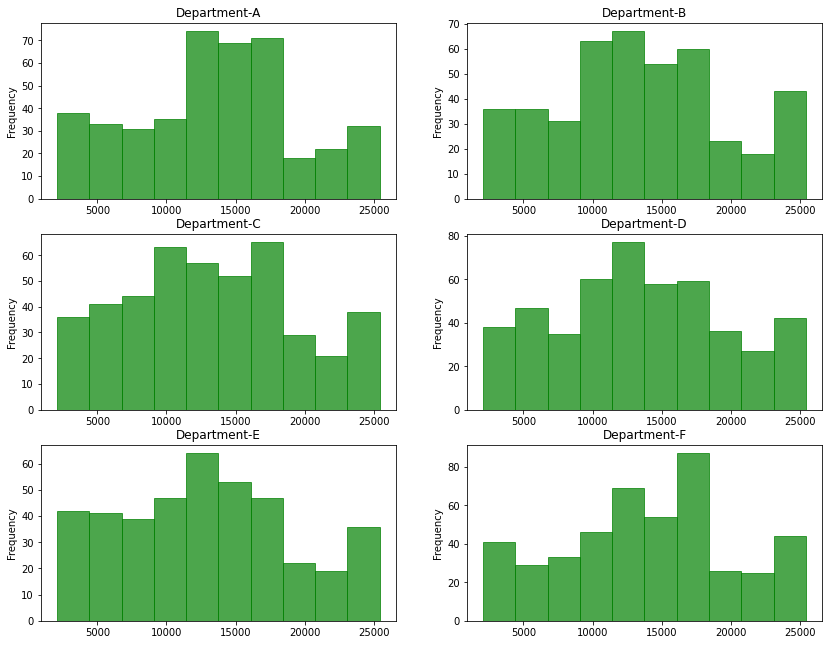

In [13]:
plot_1d_histo(df, 'Department')

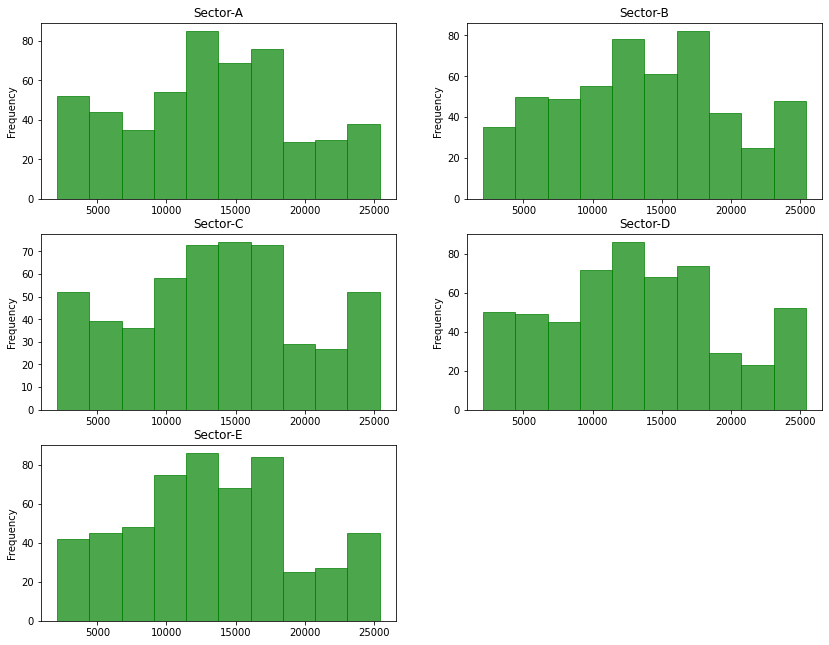

In [14]:
plot_1d_histo(df, 'Sector')

In [15]:
def plot_1d_and_boxplot(values):
  try:
    # Get statistics
    min_val = values.min()
    max_val = values.max()
    mean_val = values.mean()
    med_val = values.median()
    mod_val = values.mode()[0]
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    # Plot the histogram   
    ax[0].hist(values)
    ax[0].set_ylabel('Frequency')
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    # Plot the boxplot
    ax[1].boxplot(values, vert=False)
    ax[1].set_xlabel('Value')
    fig.suptitle('Data Distribution')
    fig.show()
    return None
  except RuntimeError:
    print('Could not plotted histogram and boxplot!')

Minimum:2085.00
Mean:13465.58
Median:13865.00
Mode:16519.00
Maximum:25412.00



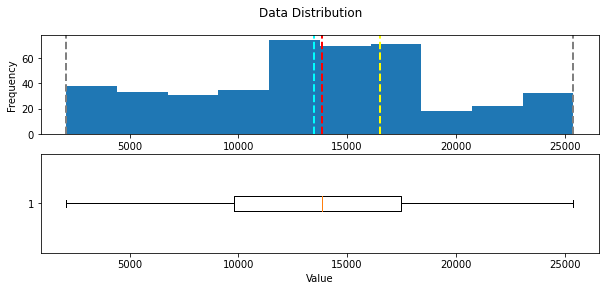

In [16]:
# Get the variable to examine
values = df[df['Department']=='Department-A']['Trip']
plot_1d_and_boxplot(values)

In [17]:
def plot_pie_chart(values, labels):
  try:
    plt.pie(values, labels = labels, autopct='%.0f%%')
    return None
  except RuntimeError:
    print('Could not plotted pie chart!')       

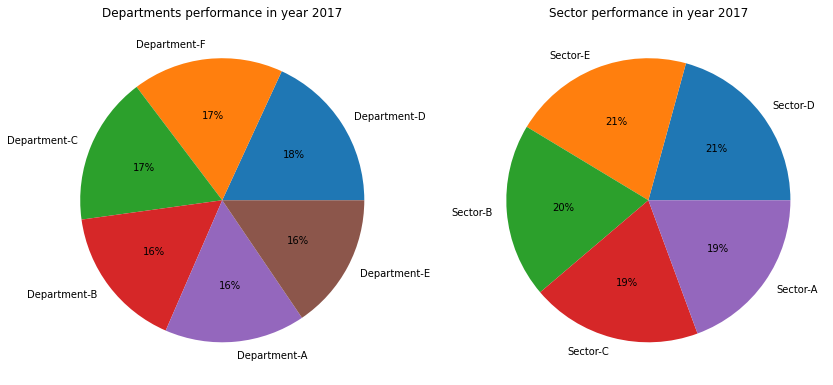

In [18]:
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(14, 11))
plt.subplot(1,2,1)
plot_pie_chart(df['Department'].value_counts().values,
               df['Department'].value_counts().index)
plt.title('Departments performance in year 2017')
plt.subplot(1,2,2)
plot_pie_chart(df['Sector'].value_counts().values,
               df['Sector'].value_counts().index)
plt.title('Sector performance in year 2017')
plt.show()

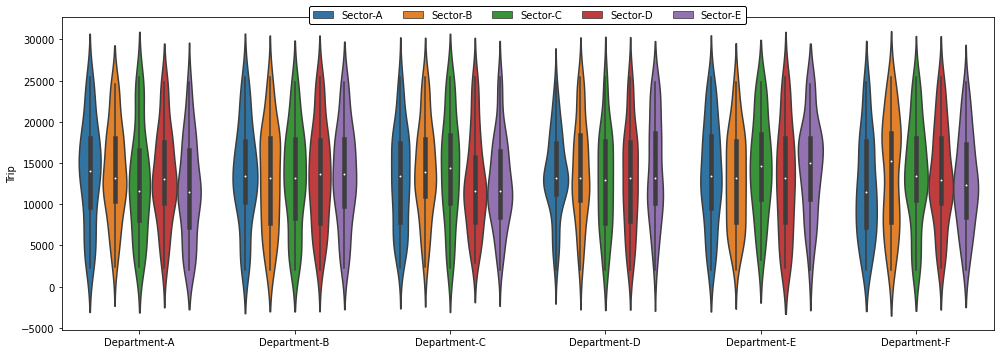

In [19]:
# trip distributions grouped by departments and sectors
plt.figure(figsize=(14, 5))
x = sorted(df['Department'])
hue_order = sorted(df['Sector'].value_counts().index)
sns.violinplot(x = x, y = 'Trip', hue = 'Sector', hue_order = hue_order, 
               data = df, split = False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), 
           ncol=len(df['Sector'].value_counts()), 
           facecolor='white', framealpha=1, edgecolor='black', fancybox=True)
plt.tight_layout()
plt.show()

In [20]:
df_reports

,Report,Date,Information,Department,Sector,Score,Destination
0,1,2017-06-04,IJK - QSLWZ,Department-B,Sector-B,61,IJK
1,2,2017-11-21,IKM - IATRW,Department-E,Sector-B,113,IKM
2,3,2017-06-18,IJL - AFNXM,Department-B,Sector-D,69,IJL
3,4,2017-03-31,JKM - COIVL,Department-C,Sector-E,31,JKM
4,5,2017-09-26,ILM - HQTYW,Department-B,Sector-D,93,ILM
...,...,...,...,...,...,...,...
99995,99996,2017-04-07,JKM - LSKCE,Department-B,Sector-B,47,JKM
99996,99997,2017-01-23,IKL - USXYD,Department-B,Sector-B,19,IKL
99997,99998,2017-07-08,IJL - YEVOZ,Department-C,Sector-C,79,IJL
99998,99999,2017-12-27,IKL - MXZYL,Department-B,Sector-C,129,IKL


In [21]:
# group by department and sector and do an aggregation on trips
grouped_df = df.groupby(['Department','Sector']).agg({'Trip': ['mean', 'min', 'max']})
grouped_df.columns = ['Trip_mean', 'Trip_min', 'Trip_max']
grouped_df = grouped_df.reset_index()
grouped_df

,Department,Sector,Trip_mean,Trip_min,Trip_max
0,Department-A,Sector-A,14122.317647,2387.0,25412.0
1,Department-A,Sector-B,13484.247191,2085.0,25412.0
2,Department-A,Sector-C,12989.857143,2085.0,25412.0
3,Department-A,Sector-D,14524.274725,2902.0,25412.0
4,Department-A,Sector-E,12095.988636,2085.0,24147.0
5,Department-B,Sector-A,13930.611111,2085.0,25412.0
6,Department-B,Sector-B,13619.474747,2085.0,24788.0
7,Department-B,Sector-C,12165.170732,2085.0,25412.0
8,Department-B,Sector-D,13712.846154,2387.0,24788.0
9,Department-B,Sector-E,13417.378049,2211.0,24788.0


## Analysis with PySpark

In this section analysis is done by using PySpark.

In [22]:
# for setting up PySpark in google colab is to download Java 
# as Spark requires JVM to run, install the latest version of OpenJDK
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# install Apache Spark 3.1.1 with Hadoop 3 from https://downloads.apache.org/
!wget -q https://downloads.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
!tar -xf spark-3.3.1-bin-hadoop3.tgz

In [23]:
# set the envrionment to run Pyspark in the Colab environment
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [24]:
# import the findspark library which will assist in locating and importing Spark 
# on the system. Findspark adds PySpark to the system path at run time as it is not present by default.
!pip install -q findspark

import findspark
print(findspark.find())
findspark.init()

/content/spark-3.3.1-bin-hadoop3


In [25]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SparkDataFrames").getOrCreate()

In [26]:
# Create a PySpark dataframe with the generated data
df_reports_spark = spark.createDataFrame(df_reports)
df_reports_spark.show(5)

+------+-------------------+-----------+------------+--------+-----+-----------+
|Report|               Date|Information|  Department|  Sector|Score|Destination|
+------+-------------------+-----------+------------+--------+-----+-----------+
|     1|2017-06-04 00:00:00|IJK - QSLWZ|Department-B|Sector-B|   61|        IJK|
|     2|2017-11-21 00:00:00|IKM - IATRW|Department-E|Sector-B|  113|        IKM|
|     3|2017-06-18 00:00:00|IJL - AFNXM|Department-B|Sector-D|   69|        IJL|
|     4|2017-03-31 00:00:00|JKM - COIVL|Department-C|Sector-E|   31|        JKM|
|     5|2017-09-26 00:00:00|ILM - HQTYW|Department-B|Sector-D|   93|        ILM|
+------+-------------------+-----------+------------+--------+-----+-----------+
only showing top 5 rows



In [27]:
# Create a PySpark dataframe with the generated data
df_trips_spark = spark.createDataFrame(df_trips)
df_trips_spark.show(5)

+-------------------+-----------+-----+
|               Date|Destination| Trip|
+-------------------+-----------+-----+
|2017-02-13 00:00:00|        IJL| 5438|
|2017-11-11 00:00:00|        IJK|24016|
|2017-07-01 00:00:00|        IKL|14655|
|2017-05-13 00:00:00|        IKM|11475|
|2017-05-18 00:00:00|        IJL|11569|
+-------------------+-----------+-----+
only showing top 5 rows

